In [59]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [60]:
df = pd.read_csv('C:/Users/moham/Desktop/itemOne.csv')
df

,date,sales,store,item,price,total,profite,purchase
0,15/01/13,682,1,1,75,1350,405,2
1,15/02/13,597,1,1,75,12975,3893,2
2,15/03/13,51,1,1,75,6825,2048,2
3,15/04/13,809,1,1,75,12075,3623,1
4,15/05/13,465,1,1,75,17025,5108,1
...,...,...,...,...,...,...,...,...
122,15/03/23,878,1,1,75,2475,743,1
123,15/04/23,699,1,1,75,2700,810,2
124,15/05/23,681,1,1,75,7500,2250,2
125,15/06/23,234,1,1,75,8850,2655,2


In [61]:
# Filter records for store 1 and item 1 -> to be able to scale to other items in the future
df = df[df['store'] == 1]

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')

# Create Date-related Features for EDA and Supervised ML: Regression
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df['weekday'] == 0, 7, df['weekday'])

# Split the series for prediction
temp_df = df.set_index('date')
train_df = temp_df.loc[:'2021-12-31']                         
test_df = temp_df.loc['2022-01-01':]

train_df.head()

,sales,store,item,price,total,profite,purchase,year,month,day,weekday
date,,,,,,,,,,,
2013-01-15,682,1,1,75,1350,405,2,2013,1,15,1
2013-02-15,597,1,1,75,12975,3893,2,2013,2,15,4
2013-03-15,51,1,1,75,6825,2048,2,2013,3,15,4
2013-04-15,809,1,1,75,12075,3623,1,2013,4,15,7
2013-05-15,465,1,1,75,17025,5108,1,2013,5,15,2


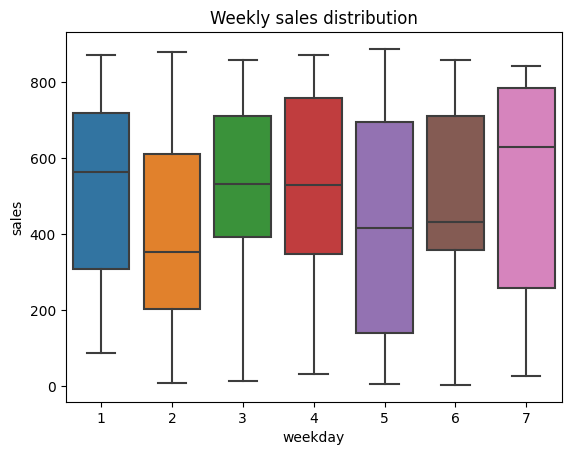

In [62]:
plot = sn.boxplot(x='weekday', y='sales', data=df)
_ = plot.set(title='Weekly sales distribution')

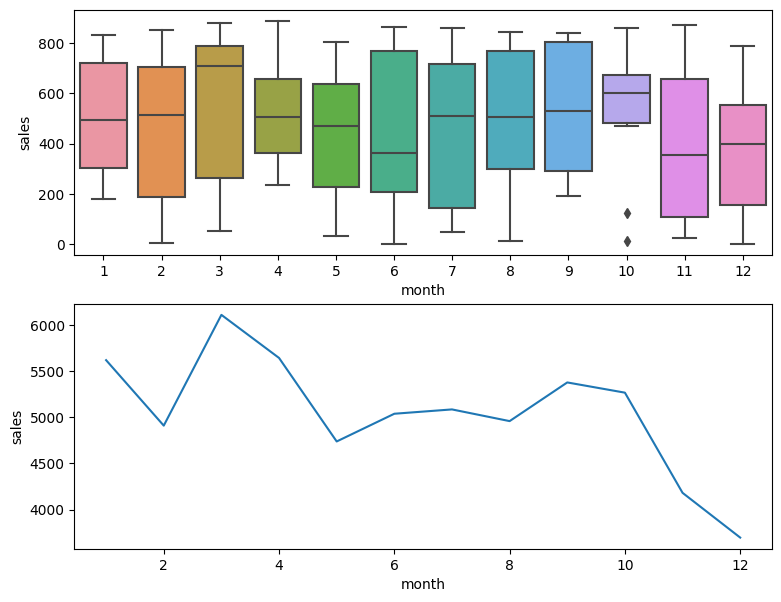

In [63]:
monthly_agg = df.groupby('month')['sales'].sum().reset_index()
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
sn.boxplot(x='month', y='sales', data=df, ax=axs[0])
_ = sn.lineplot(x='month', y='sales', data=monthly_agg, ax=axs[1])

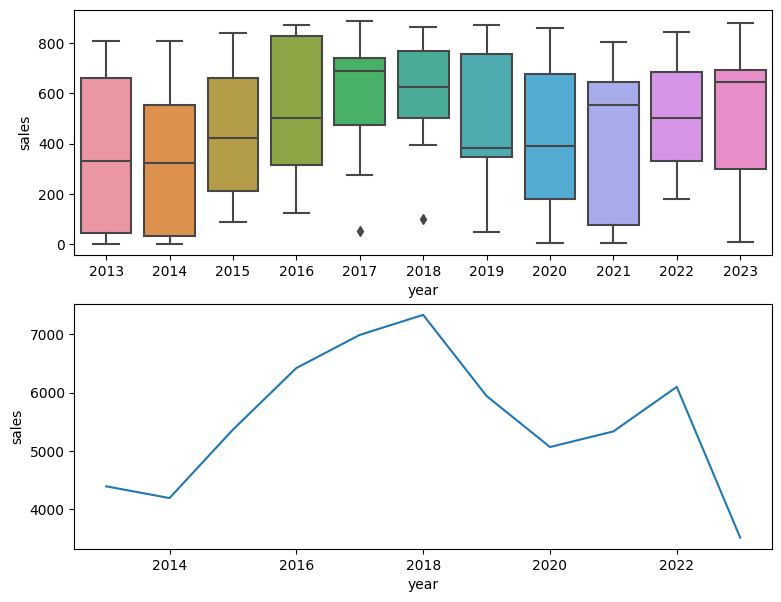

In [64]:
yearly_agg = df.groupby('year')['sales'].sum().reset_index()
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
sn.boxplot(x='year', y='sales', data=df, ax=axs[0])
_ = sn.lineplot(x='year', y='sales', data=yearly_agg, ax=axs[1])

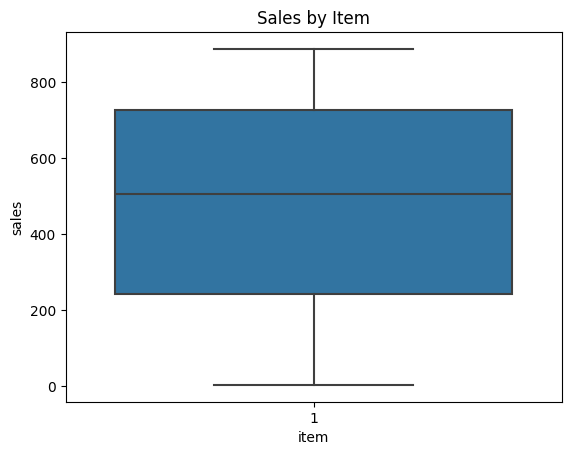

In [65]:
import seaborn as sns
# Sales by item
sns.boxplot(x='item', y='sales', data=df)
plt.title('Sales by Item')
plt.show()

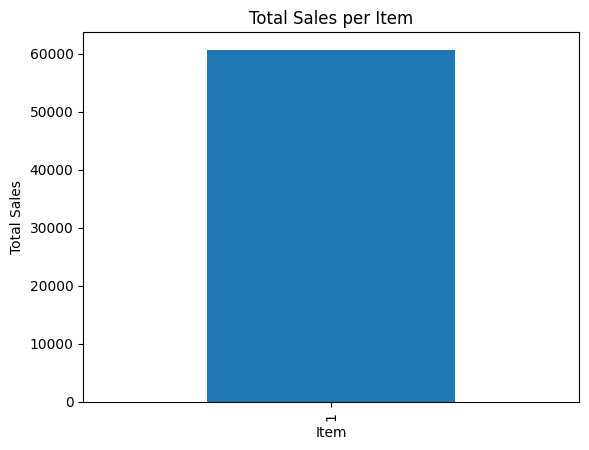

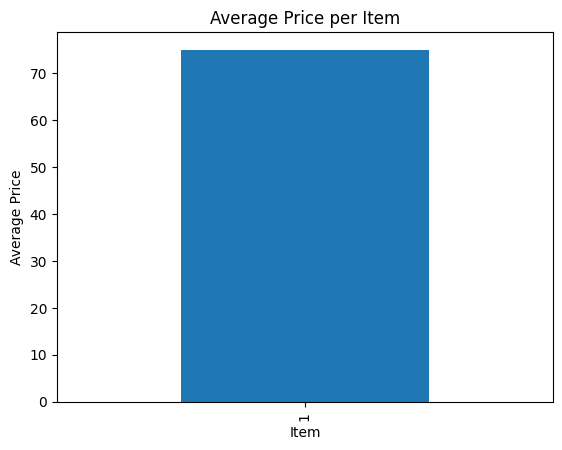

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total sales per item
item_sales = df.groupby('item')['sales'].sum()
item_sales.plot(kind='bar')
plt.title('Total Sales per Item')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.show()

# Average price per item
avg_price_per_item = df.groupby('item')['price'].mean()
avg_price_per_item.plot(kind='bar')
plt.title('Average Price per Item')
plt.xlabel('Item')
plt.ylabel('Average Price')
plt.show()

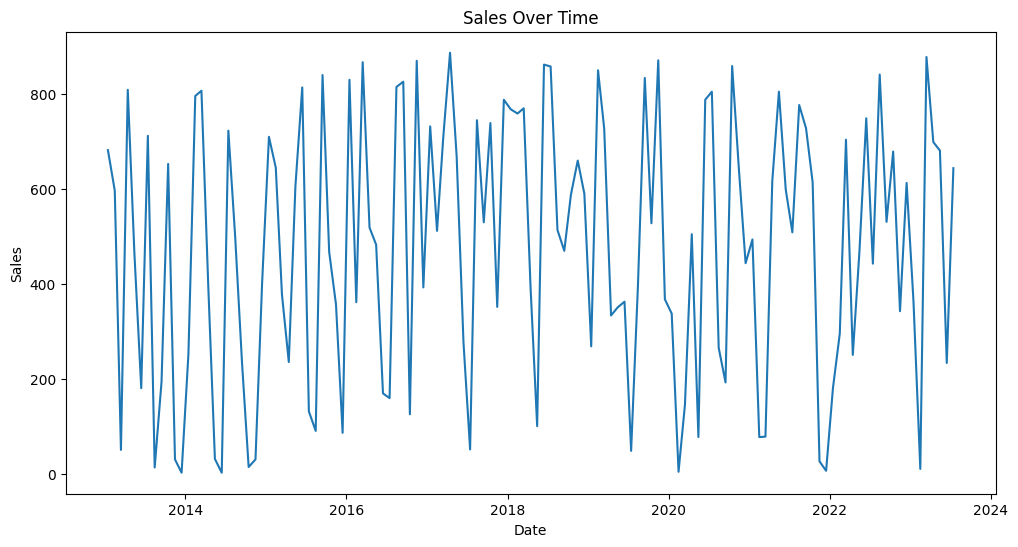

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Convert the 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Plotting sales over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

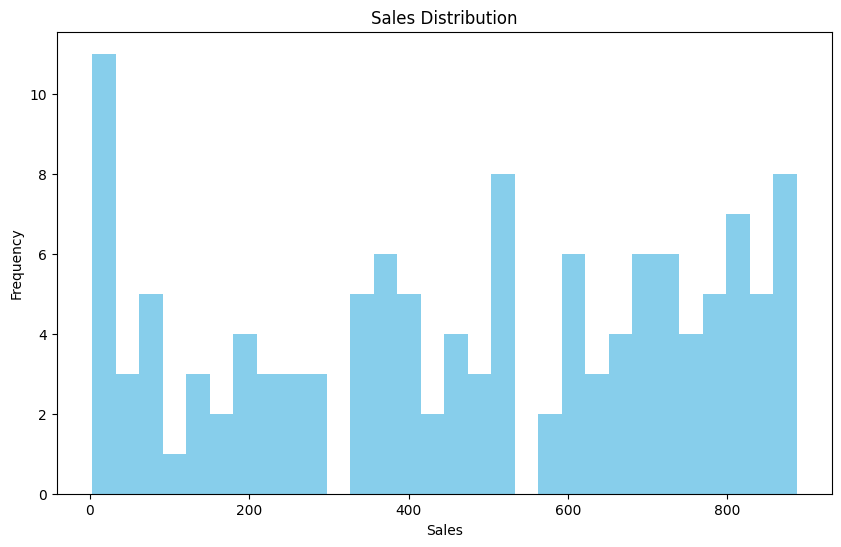

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(df['sales'], bins=30, color='skyblue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

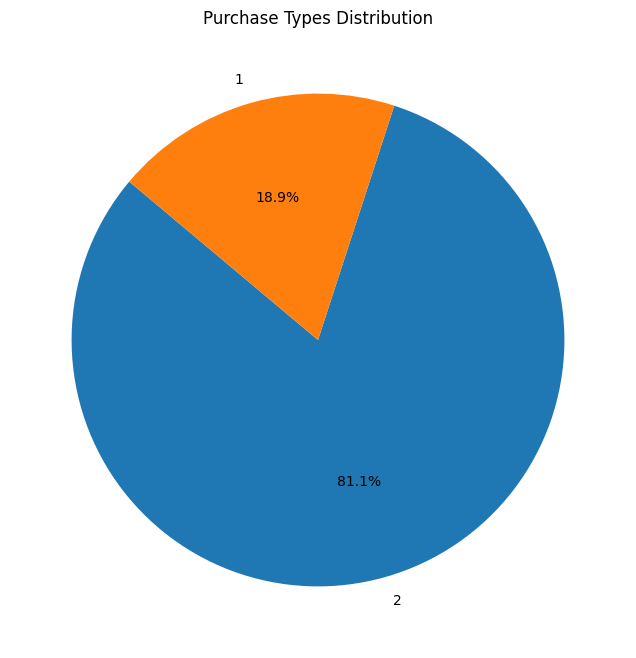

In [71]:
purchase_types = df['purchase'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
purchase_types.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Purchase Types Distribution')
plt.ylabel('')
plt.show()